# 3. Find similar wines!

### Implement the k-means clustering algorithm and test it on wines dataframe.

#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

#### Organizing the data

For this task, we need to use the Wine Data Set.
However, looking at the data, the file wine.data miss of attributes and features, so we can add them by looking at the main page of the dataset.

In [19]:
columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavonoids', 'Nonflavanoid phenols',
           'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [20]:
wines = pd.read_csv(r"C:\Users\Notebook HP\Desktop\Homeworks\HW4\Exercise 3\wine.data", names = columns)
wines = pd.DataFrame(wines)
wines.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [21]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW4\Exercise 3\wine.names') as f:
    names = f.read()
names.split('\n');

Reading the wine.names file, we know that these are:
1. wines grown in the same region in Italy but derived from three different cultivars (Class).
2. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Therefore we can imagine that the analysis will lead to the distinction of these 13 categories with respect to the three types of wines.

#### Studying the data

In [22]:
wines.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [79]:
wines.shape

(178, 14)

We plot two random features in respect to the attribute Class.

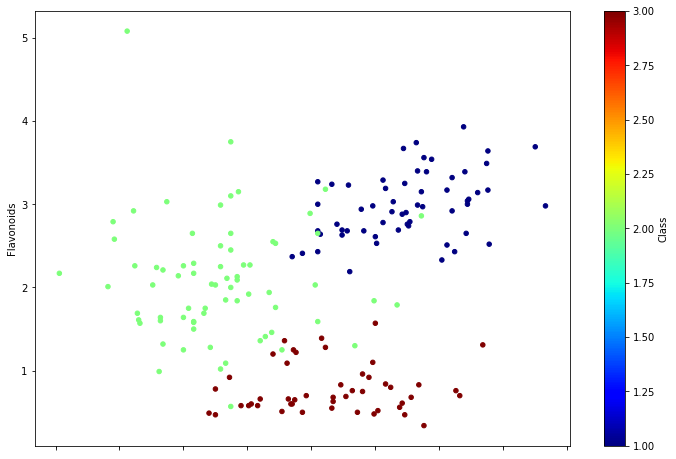

In [80]:
wines.plot.scatter(x = 'Alcohol', y = 'Flavonoids', c = 'Class', figsize=(12,8), colormap='jet');

We can already see three possible clusters.

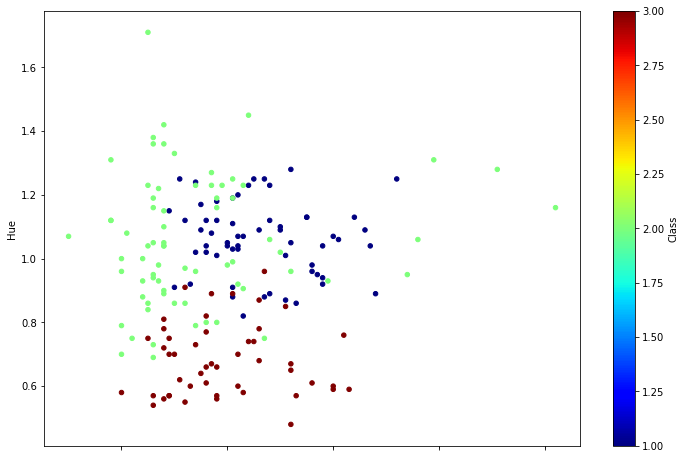

In [81]:
wines.plot.scatter(x = 'Magnesium', y = 'Hue', c = 'Class', figsize=(12,8), colormap='jet');

Even in this case, we can see at least two possible clusters, so we can imagine that this distribution depends on the 3 different classes.
Therefore we'll try to consider K = 3 clusters in our analysis.

##### Implement k-means

We'll consider our first example, so features 'Alcohol' and 'Flavonoids'.

In [82]:
#We define a C array of all 178 rows and two features 'Alcohol' and 'Flavonoids'.
d = wines.iloc[:, [1, 7]].values
d[:5]

array([[14.23,  3.06],
       [13.2 ,  2.76],
       [13.16,  3.24],
       [14.37,  3.49],
       [13.24,  2.69]])

In [83]:
#Number of data points
n = 178
#Number of features to consider. 
m = 2 
#Number of iteractions for the centroids positions.
iteractions = 100
#Number of desired clusters.
K = 3

In [84]:
#Numpy array of the centroids.
Cent = np.array([]).reshape(m,0) 
Cent

array([], shape=(2, 0), dtype=float64)

In [85]:
#Initializing random centroids
for i in range(K):
    #Random number of row
    r = rd.randint(0, n-1)
    #Centroids of K elements by column
    Cent = np.c_[Cent, d[r]]
Cent

array([[14.19, 13.73, 14.22],
       [ 3.93,  0.47,  3.04]])

In [86]:
EDist = np.array([]).reshape(n, 0)
for k in range(K):
    #Euclidean distance from elements of d and k random centroid
    Dist = np.sum((d - Cent[:,k])**2, axis = 1)
    #Adding column of distances from the k centroid
    EDist = np.c_[EDist, Dist]
#Index that gives the nearest centroid from the data point in d
nearp = np.argmin(EDist, axis = 1) + 1
nearp

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 1, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [87]:
#Initializing dictionary D 
D={}
for k in range(K):
    #D key value k+1 (name of the centroid)
    D[k+1]=np.array([]).reshape(2,0)
    
for i in range(n):
    #Assigning each value of d to the nearest centroid k+1
    D[nearp[i]]=np.c_[D[nearp[i]],d[i]]
     
for k in range(K):
    #Making the transpose for plotting the data
    D[k+1]=D[k+1].T
    
for k in range(K):
    #Giving a better value (mean of nearest points) to the centroid
     Cent[:,k]=np.mean(D[k+1],axis=0)

Now we can repeat the same algorithm for a certain number of iteractions, to improve the clusters.

In [88]:
for i in range(iteractions):
     
    EDist=np.array([]).reshape(n,0)
    
    for k in range(K):
        Dist = np.sum((d-Cent[:,k])**2,axis=1)
        EDist = np.c_[EDist, Dist]
    nearp = np.argmin(EDist, axis=1) + 1
     
    D={}
    for k in range(K):
        D[k+1]=np.array([]).reshape(2,0)
    for i in range(n):
        D[nearp[i]]=np.c_[D[nearp[i]],d[i]]

    for k in range(K):
        D[k+1]=D[k+1].T

    for k in range(K):
        Cent[:,k]=np.mean(D[k+1],axis=0)
    defres = D

#### Plotting the result.

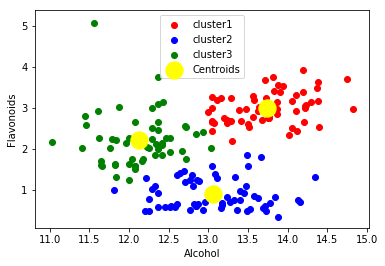

In [90]:
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(defres[k+1][:,0], defres[k+1][:,1], c = color[k], label = labels[k])
plt.scatter(Cent[0,:],Cent[1,:], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('Alcohol')
plt.ylabel('Flavonoids')
plt.legend()
plt.show()

#### Function for clustering

In [93]:
def clustering(i,j):
    d = wines.iloc[:, [i, j]].values
    n = d.shape[0] 
    m = d.shape[1] 
    iteractions = 100
    K = 3 
    Cent = np.array([]).reshape(m,0)
    
    #Initializing random centroids
    for i in range(K):
        #Random number of row
        r = rd.randint(0, n-1)
        #Centroids of K elements by column
        Cent = np.c_[Cent, d[r]]
    
    EDist = np.array([]).reshape(n, 0)
    for k in range(K):
        #Euclidean distance from elements of d and k random centroid
        Dist = np.sum((d - Cent[:,k])**2, axis = 1)
        #Adding column of distances from the k centroid
        EDist = np.c_[EDist, Dist]
    #Index that gives the nearest centroid from the data point in d
    nearp = np.argmin(EDist, axis = 1) + 1
    
    #Initializing dictionary D 
    D={}
    for k in range(K):
        #D key value k+1 (name of the centroid)
        D[k+1]=np.array([]).reshape(2,0)

    for i in range(n):
        #Assigning each value of d to the nearest centroid k+1
        D[nearp[i]]=np.c_[D[nearp[i]],d[i]]

    for k in range(K):
        #Making the transpose for plotting the data
        D[k+1]=D[k+1].T

    for k in range(K):
        #Giving a better value (mean of nearest points) to the centroid
         Cent[:,k]=np.mean(D[k+1],axis=0)
            
    #Iteraction of the same script...
    for i in range(iteractions):
     
        EDist=np.array([]).reshape(n,0)

        for k in range(K):
            Dist = np.sum((d-Cent[:,k])**2,axis=1)
            EDist = np.c_[EDist, Dist]
        nearp = np.argmin(EDist, axis=1) + 1

        D={}
        for k in range(K):
            D[k+1]=np.array([]).reshape(2,0)
        for i in range(n):
            D[nearp[i]]=np.c_[D[nearp[i]],d[i]]

        for k in range(K):
            D[k+1]=D[k+1].T

        for k in range(K):
            Cent[:,k]=np.mean(D[k+1],axis=0)
        defres = D
    
    return defres
    

### Looking at the plots.

In [98]:
def clust(s):
    
    columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavonoids', 'Nonflavanoid phenols',
               'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
    
    for i in range(14):
        
        if i != s:            
            R = clustering(s,i)            
            color=['red','blue','green']
            labels=['cluster1','cluster2','cluster3']            
            for k in range(K):
                plt.scatter(R[k+1][:,0],R[k+1][:,1],c=color[k],label=labels[k])
            
            plt.xlabel(columns[s])
            plt.ylabel(columns[i])
            plt.legend()
            plt.show()

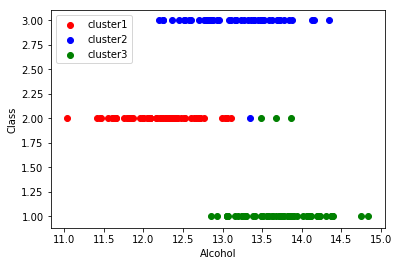

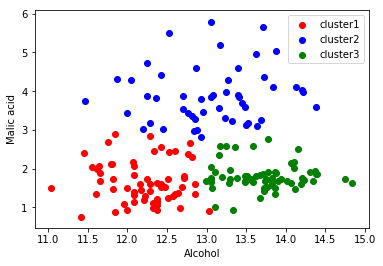

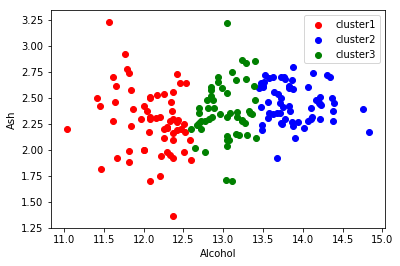

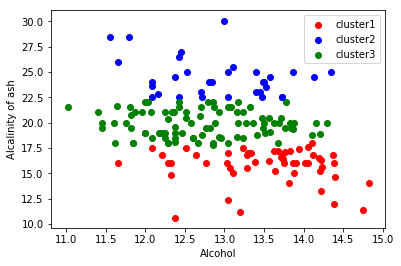

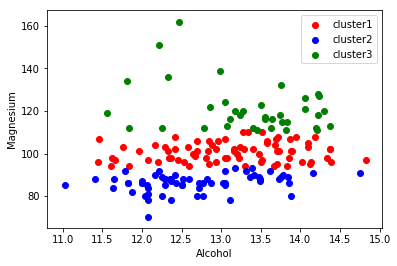

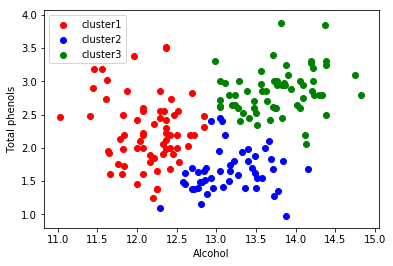

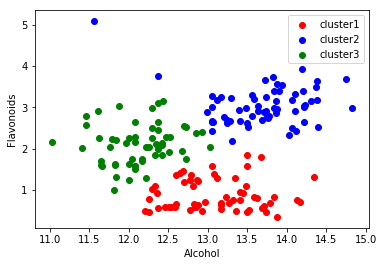

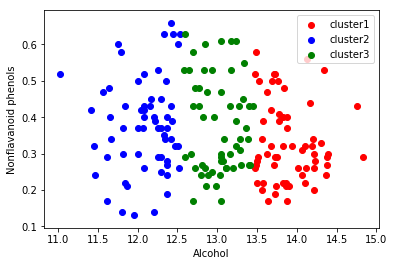

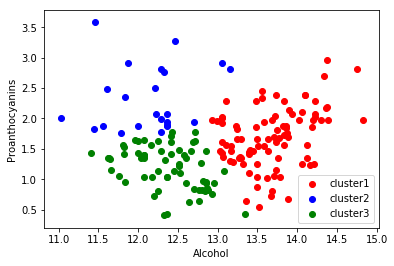

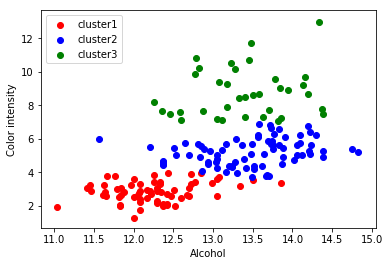

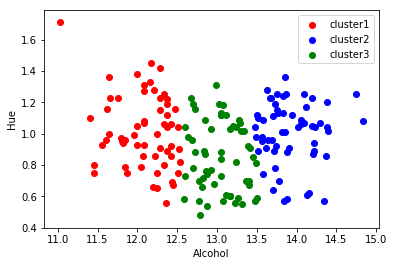

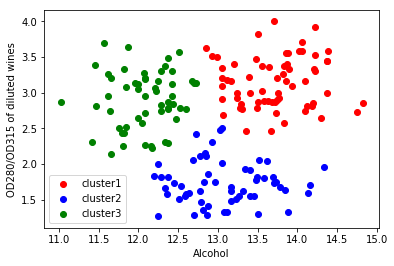

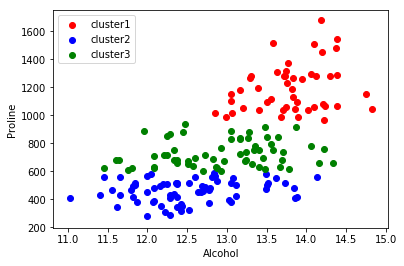

In [97]:
clust(1)

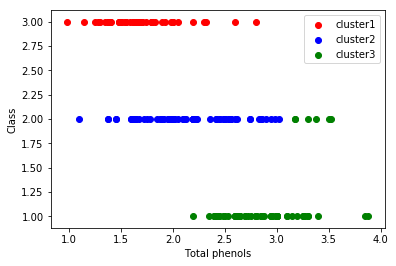

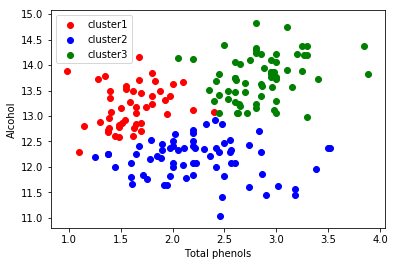

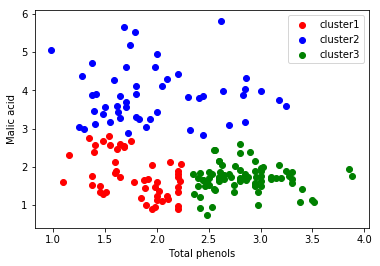

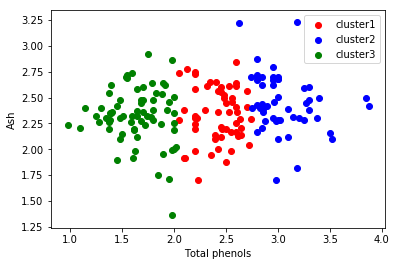

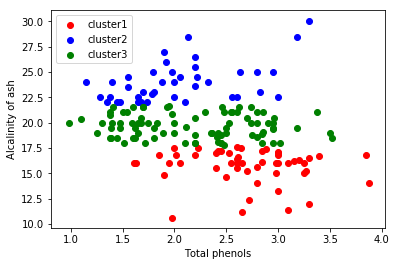

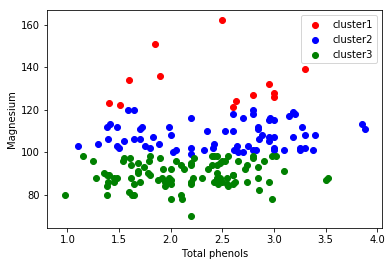

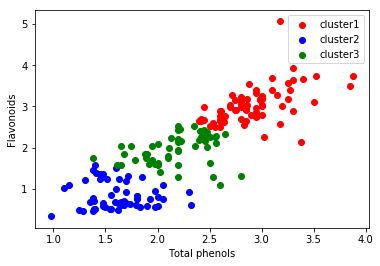

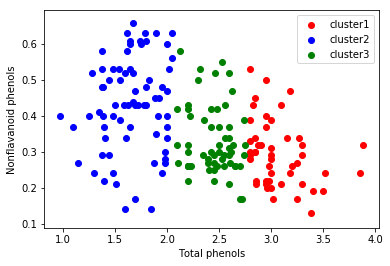

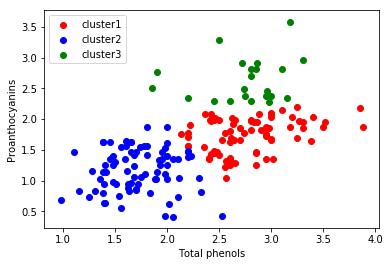

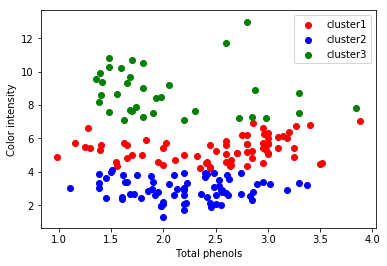

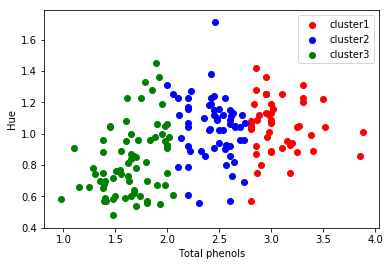

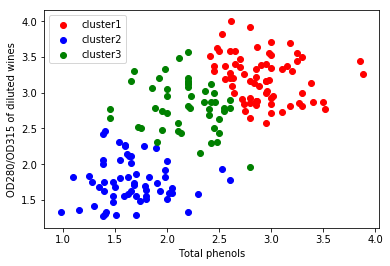

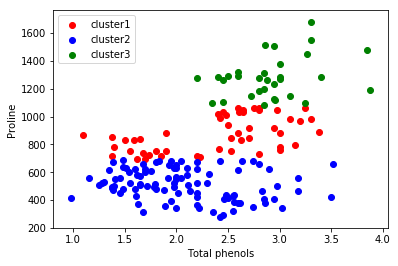

In [104]:
clust(6)

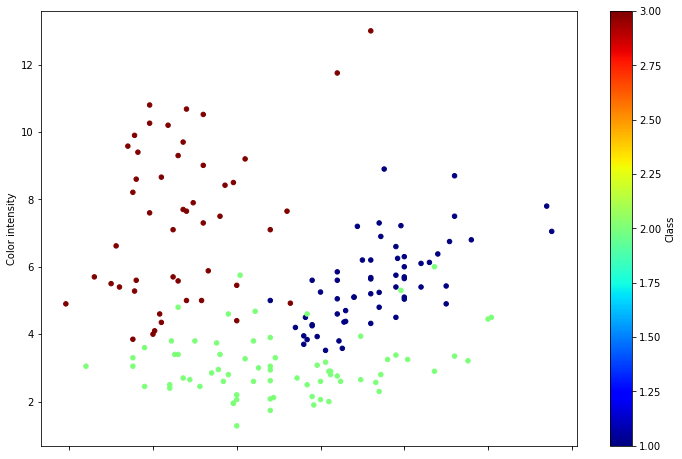

In [101]:
wines.plot.scatter(x = 'Total phenols', y = 'Color intensity', c = 'Class', figsize=(12,8), colormap='jet');

As already noticed before, all wines have are clustered by their attribute class (1,2,3), which produce very different wines, and all their features are linked by this different attributes. In fact the clusters and the class filter, generate very similar patterns of data distributions.